In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
file_name = './hw2_wiki/spiders/sitegraph3.json'

In [3]:
with open(file_name, 'rb') as f:
    data = f.readlines()
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
main_df = pd.read_json(data_json_str)
main_df['url'] = main_df['url'].astype(basestring).map(lambda x : x.strip())
main_df['linked_urls'] = main_df['linked_urls'].replace(np.nan, None)
main_df.head()

,linked_urls,snippet,title,url
0,[https://en.wikipedia.org/wiki/Belarusian_lang...,Minsk (Belarusian: Мінск pronounced [mʲinsk]; ...,Minsk,https://en.wikipedia.org/wiki/Minsk
1,[https://en.wikipedia.org/wiki/Boreal_ecosyste...,Hemiboreal means halfway between the temperate...,Hemiboreal,https://en.wikipedia.org/wiki/Hemiboreal
2,[https://en.wikipedia.org/wiki/Australia_(cont...,Coordinates: 27°S 133°E﻿ / ﻿27°S 133°E﻿ / -27;...,Australia,https://en.wikipedia.org/wiki/Australia
3,[https://en.wikipedia.org/wiki/Belarusian_lang...,Chelyuskinitev Park (Belarusian: Парк Чалюскiн...,Chelyuskinites Park,https://en.wikipedia.org/wiki/Chelyuskinites_Park
4,"[https://en.wikipedia.org/wiki/Interglacial, h...","The Quaternary glaciation, also known as the P...",Quaternary glaciation,https://en.wikipedia.org/wiki/Quaternary_glaci...


In [4]:
dg = nx.DiGraph()
edges = [ (i[0],j) for i in zip(main_df['url'], main_df['linked_urls']) for j in i[1] if i[1]]
dg.add_edges_from(edges)
print 'number of nodes: ', dg.number_of_nodes()
print 'number of edges: ', dg.number_of_edges()

number of nodes:  222741
number of edges:  414078


In [5]:
def calculate_pageRank(graph, main_df, alpha):
    def pretty_print(df):
        for r in df.sort_values('pageRank', ascending=False).iterrows():
            print u'{0} {1}\n{2}\n{3}\n'.format(r[1]['title'],r[1]['pageRank'],r[1]['url'],r[1]['snippet'])
    pr = nx.pagerank(graph, alpha=alpha)
    pr_df = pd.DataFrame([(key, pr[key]) for key in sorted(pr, key=pr.get, reverse=True)][:10], columns=['url','pageRank'])
    result_df = pd.merge(main_df, pr_df, on='url')
    pretty_print(result_df)


In [ ]:
calculate_pageRank(dg, main_df, 0.85)

In [7]:
calculate_pageRank(dg, main_df, 0.9)

United States 0.038712816225
https://en.wikipedia.org/wiki/United_States
Coordinates: 40°N 100°W﻿ / ﻿40°N 100°W﻿ / 40; -100...

Russia 0.0331014574145
https://en.wikipedia.org/wiki/Russia
Coordinates: 60°N 90°E﻿ / ﻿60°N 90°E﻿ / 60; 90...

Statute of Westminster 1931 0.0253213948181
https://en.wikipedia.org/wiki/Statute_of_Westminster_1931
The Statute of Westminster 1931 is an Act of the Parliament of the United Kingdom and modified versions of it are now domestic law within Australia and Canada; it has been repealed in New Zealand and implicitly in former Dominions that are no longer Commo...

Canada 0.0251399416919
https://en.wikipedia.org/wiki/Canada
Coordinates: 60°N 95°W﻿ / ﻿60°N 95°W﻿ / 60; -95...

Eurasia 0.0165107650587
https://en.wikipedia.org/wiki/Eurasia
Eurasia /jʊˈreɪʒə/ is a combined continental landmass of Europe and Asia.[2][3][4] The term is a portmanteau of its constituent continents. Located primarily in the Northern and Eastern Hemispheres, it is bordered by the Atla

In [8]:
calculate_pageRank(dg, main_df, 0.5)

United States 0.019148027943
https://en.wikipedia.org/wiki/United_States
Coordinates: 40°N 100°W﻿ / ﻿40°N 100°W﻿ / 40; -100...

Russia 0.0102939168788
https://en.wikipedia.org/wiki/Russia
Coordinates: 60°N 90°E﻿ / ﻿60°N 90°E﻿ / 60; 90...

Canada 0.00999192040816
https://en.wikipedia.org/wiki/Canada
Coordinates: 60°N 95°W﻿ / ﻿60°N 95°W﻿ / 60; -95...

Statute of Westminster 1931 0.00607815723965
https://en.wikipedia.org/wiki/Statute_of_Westminster_1931
The Statute of Westminster 1931 is an Act of the Parliament of the United Kingdom and modified versions of it are now domestic law within Australia and Canada; it has been repealed in New Zealand and implicitly in former Dominions that are no longer Commo...

Australia 0.00400081178392
https://en.wikipedia.org/wiki/Australia
Coordinates: 27°S 133°E﻿ / ﻿27°S 133°E﻿ / -27; 133...

Sweden 0.00388428541177
https://en.wikipedia.org/wiki/Sweden
Coordinates: 63°N 16°E﻿ / ﻿63°N 16°E﻿ / 63; 16...

Eurasia 0.00300544515773
https://en.wikipedia.org/w

In [9]:
calculate_pageRank(dg, main_df, 0.3)

United States 0.0110837916861
https://en.wikipedia.org/wiki/United_States
Coordinates: 40°N 100°W﻿ / ﻿40°N 100°W﻿ / 40; -100...

Canada 0.00491512049452
https://en.wikipedia.org/wiki/Canada
Coordinates: 60°N 95°W﻿ / ﻿60°N 95°W﻿ / 60; -95...

Russia 0.00449034424018
https://en.wikipedia.org/wiki/Russia
Coordinates: 60°N 90°E﻿ / ﻿60°N 90°E﻿ / 60; 90...

Australia 0.00263473871675
https://en.wikipedia.org/wiki/Australia
Coordinates: 27°S 133°E﻿ / ﻿27°S 133°E﻿ / -27; 133...

Sweden 0.0022998954995
https://en.wikipedia.org/wiki/Sweden
Coordinates: 63°N 16°E﻿ / ﻿63°N 16°E﻿ / 63; 16...

Statute of Westminster 1931 0.00200622412323
https://en.wikipedia.org/wiki/Statute_of_Westminster_1931
The Statute of Westminster 1931 is an Act of the Parliament of the United Kingdom and modified versions of it are now domestic law within Australia and Canada; it has been repealed in New Zealand and implicitly in former Dominions that are no longer Commo...

Atlantic Ocean 0.00119645976923
https://en.wikiped

In [10]:
from matplotlib import pylab 
import matplotlib.pyplot as plt 

def show_graph(graph): 
    #initialze Figure 
    plt.figure(num=None, figsize=(20, 20), dpi=100) 
    plt.axis('off') 
    fig = plt.figure(1) 
    pos = nx.spring_layout(graph) 
    nx.draw_networkx_nodes(graph,pos) 
    nx.draw_networkx_edges(graph,pos,arrows=True) 
    #nx.draw_networkx_labels(graph,pos) 

    cut = 1
    xmax = cut * max(xx for xx, yy in pos.values()) 
    ymax = cut * max(yy for xx, yy in pos.values()) 
    plt.xlim(0, xmax) 
    plt.ylim(0, ymax) 
    plt.show()

    #it can also be saved in .svg, .png. or .ps formats

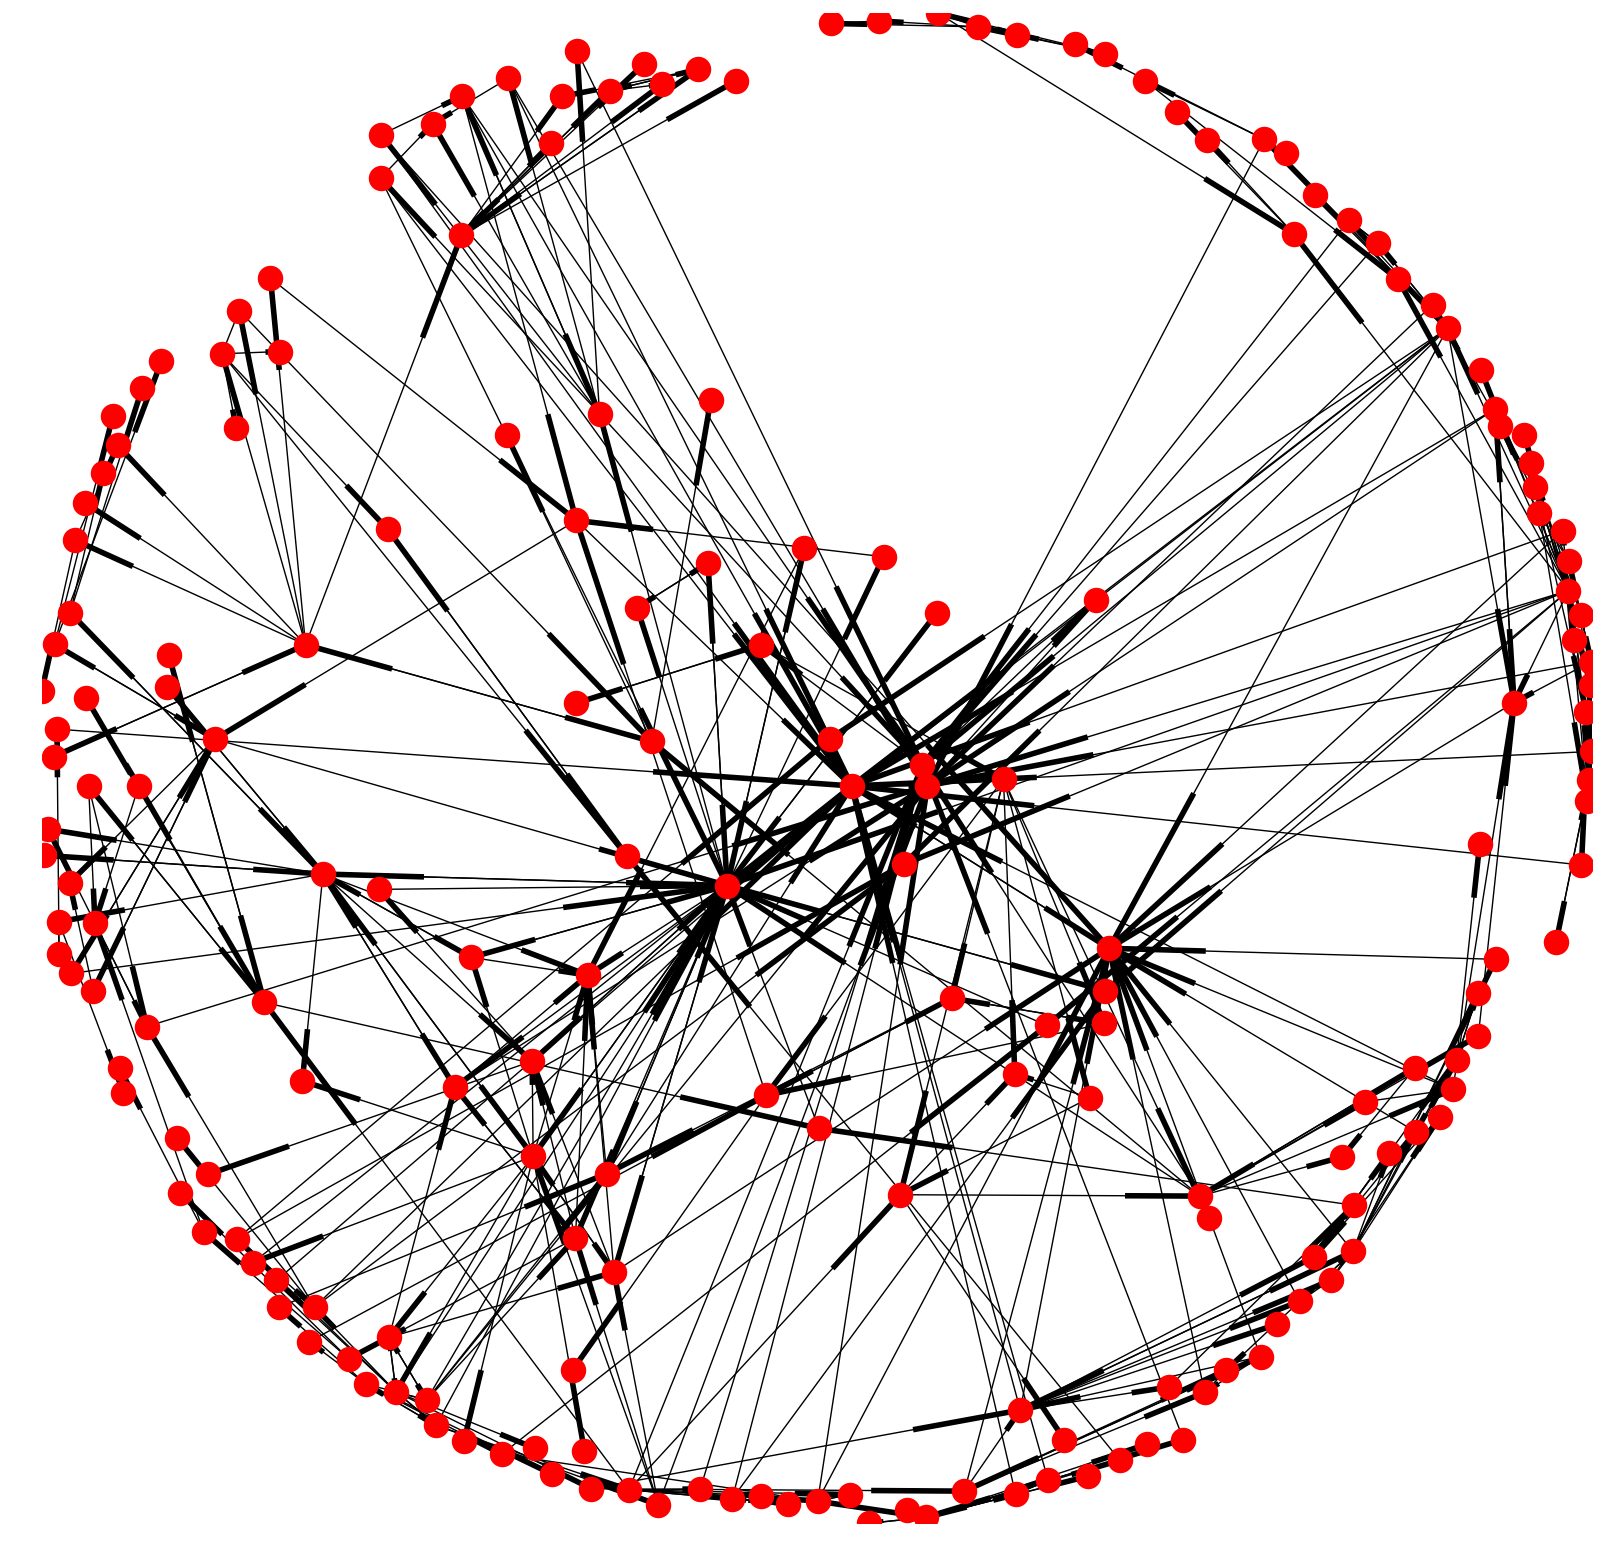

In [9]:
show_graph(dg)